In [1]:
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Lambda,Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.models import Sequential  #用來啟動 NN
from tensorflow.keras.layers import Conv2D  # Convolution Operation
from tensorflow.keras.layers import MaxPooling2D # Pooling
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense # Fully Connected Networks
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import concatenate, AveragePooling2D, UpSampling2D, add, Multiply, GlobalAveragePooling2D
import tensorflow.keras as keras  
from tensorflow.keras import backend as K
import numpy as np
import pandas as pd
import os
import random
import re
import time
from random import shuffle
from matplotlib import pyplot as plt
from scipy.stats import norm
import statistics

In [56]:
Path = 'D:/weather/Average_data/new_PDF_CFSV2/'
files=os.listdir(Path)
df_ml = pd.read_csv(Path+ files[0],header=None)
df_ml[2]

0       300.255274
1       300.227934
2       300.175556
3       300.079937
4       299.969136
           ...    
6766    277.562889
6767    277.222158
6768    277.402537
6769    277.170349
6770    276.666773
Name: 2, Length: 6771, dtype: float64

In [57]:
def average_picture_point(Path, X, Y, days):
    files=os.listdir(Path)
    count=1
    csfv2_90 = []
    csfv2_180 = []
    era5_90 = []
    era5_180 = []
    ml_90 = []
    ml_180 = []
    
    for file in files[:days]:
        start=time.time()
        df_csfv2 = pd.read_csv('D:/weather/Average_data/new_PDF_CFSV2/'+'CFSv2_T2m_USA_' + file[:-4] + '_PDF.csv',header=None)
        df_era5 = pd.read_csv('D:/weather/Average_data/new_PDF_ERA5/'+'ERA5_T2m_USA_' + file[:-4] + '_PDF.csv',header=None)
        df_ml = pd.read_csv(Path + file)
        Break=0
        Iloc = (X-1)*111 + Y
        csfv2_90.append(df_csfv2.iloc[Iloc][2])
        csfv2_180.append(df_csfv2.iloc[Iloc][7])
        era5_90.append(df_era5.iloc[Iloc][2])
        era5_180.append(df_era5.iloc[Iloc][7])
        ml_90.append(df_ml.iloc[Iloc][2])
        ml_180.append(df_ml.iloc[Iloc][7])
        end=time.time()
        Time=(end-start)*(len(files)-count)
        print('%d / %d , Time : %d : %d : %d'%(count,len(files),int(Time/3600),int(Time%3600/60),Time%3600%60),end='\r')
        count=count+1
    print('90')
    Show_picture(csfv2_90, era5_90, ml_90)
    print('180')
    Show_picture(csfv2_180, era5_180, ml_180)

In [67]:
def average_picture_all(Path, days, Label):
    files=os.listdir(Path)
    count=1
    csfv2_90 = []
    csfv2_180 = []
    era5_90 = []
    era5_180 = []
    ml_90 = []
    ml_180 = []
    
    for file in files[:days]:
        start=time.time()
        df_csfv2 = pd.read_csv('D:/weather/Average_data/new_PDF_CFSV2/'+'CFSv2_T2m_USA_' + file[:-4] + '_PDF.csv',header=None)
        df_era5 = pd.read_csv('D:/weather/Average_data/new_PDF_ERA5/'+'ERA5_T2m_USA_' + file[:-4] + '_PDF.csv',header=None)
        df_ml = pd.read_csv(Path + file)
        Break=0
        csfv2_90.append(df_csfv2[Label].mean())
        csfv2_180.append(df_csfv2[Label+5].mean())
        era5_90.append(df_era5[Label].mean())
        era5_180.append(df_era5[Label+5].mean())
        ml_90.append(df_ml[df_ml.columns[Label]].mean())
        ml_180.append(df_ml[df_ml.columns[Label+5]].mean())
        end=time.time()
        Time=(end-start)*(len(files)-count)
        print('%d / %d , Time : %d : %d : %d'%(count,len(files),int(Time/3600),int(Time%3600/60),Time%3600%60),end='\r')
        count=count+1
    print('90')
    Show_picture(csfv2_90, era5_90, ml_90)
    print('180')
    Show_picture(csfv2_180, era5_180, ml_180)

In [65]:
def Show_picture(csfv2, era5, ml):
    plt.figure(figsize=(10,4))
    plt.plot(csfv2, label='CSFV2' )
    plt.plot(era5, label='ERA5' )
    plt.plot(ml, label='Predict' )
    plt.legend()
    plt.show()    

905 / 2655 , Time : 0 : 1 : 17


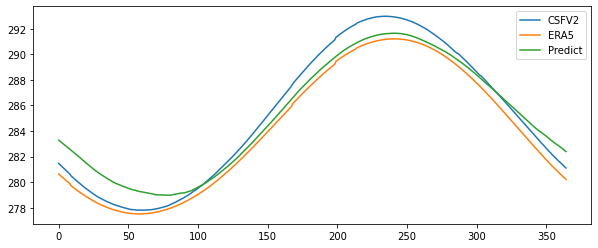

180


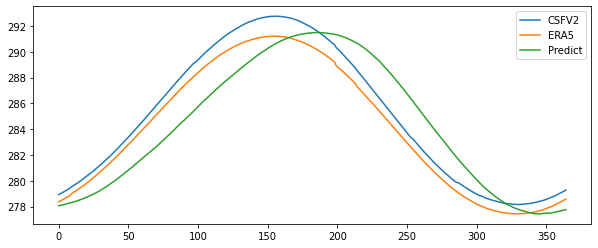

905 / 2655 , Time : 0 : 1 : 19


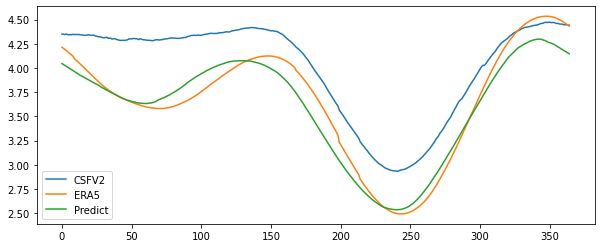

180


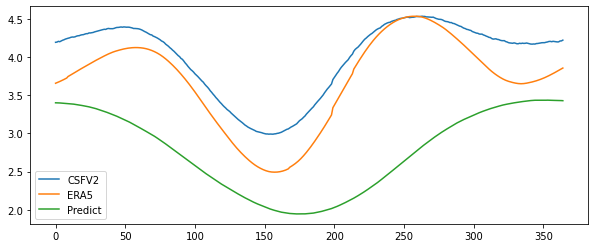

905 / 2655 , Time : 0 : 1 : 13


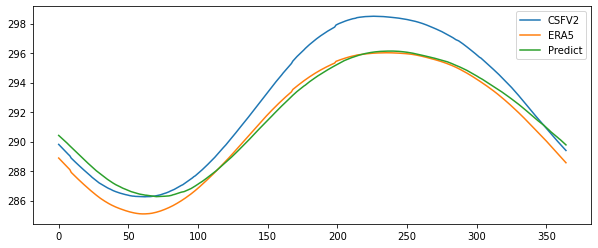

180


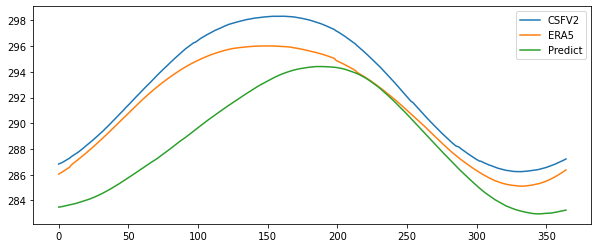

905 / 2655 , Time : 0 : 1 : 19


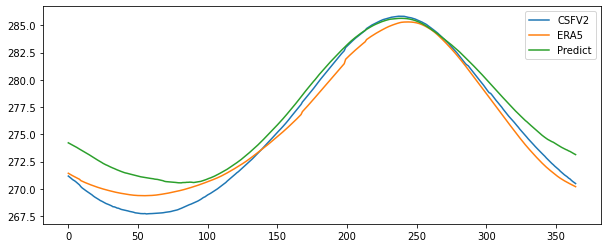

180


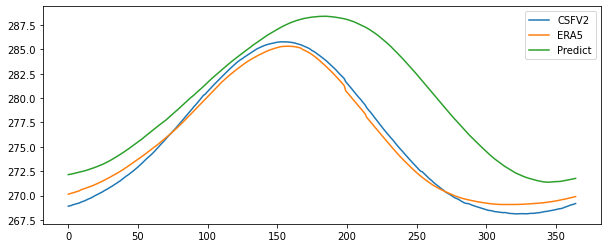

905 / 2655 , Time : 0 : 1 : 12


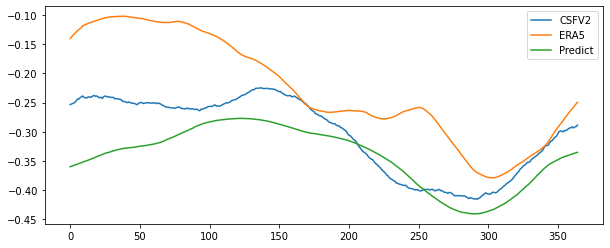

180


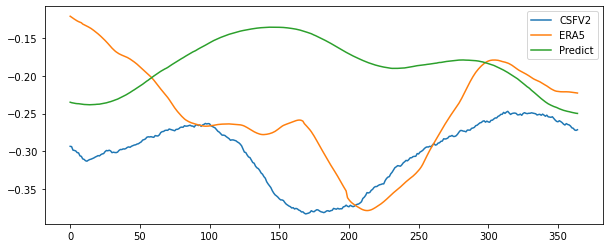

In [68]:
for i in range(2,7):
    average_picture_all('D:/weather/Predict_csv/CNN_LSTM_180_USA_oneyear_new_average/', 365, i)